# Show relationship between two quantitative variables in a data set

## Setup

In [1]:
from IPython.display import *
#HTML('<style> ' + open('../demo.css').read() + '</style>')

In [2]:
import pandas as pd
from matplotlib import pylab as plt
import os
import numpy as np
import seaborn as sns
import importlib
import show_relationship_utils as utils
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['figure.dpi'] = 144

## What you would normally do

In [4]:
df_likes_small = utils.generate_data(seed=223344, size=1e3)
df_likes_small.tail()

,likes_given,likes_received,userid
995,320,16,fake0000995
996,246,13,fake0000996
997,301,18,fake0000997
998,150,13,fake0000998
999,692,32,fake0000999


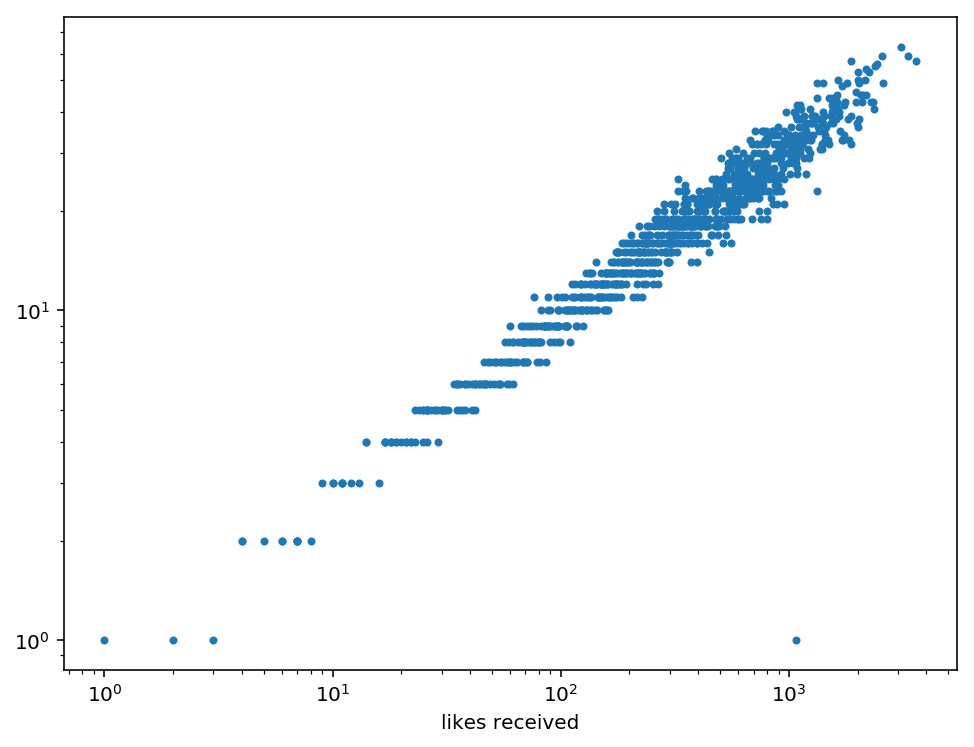

In [5]:
def plot_likes_1(df):
    fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.')
    ax.set_xlabel('likes given')
    ax.set_xlabel('likes received')
    ax.set_xscale('log')
    ax.set_yscale('log')
plot_likes_1(df_likes_small)

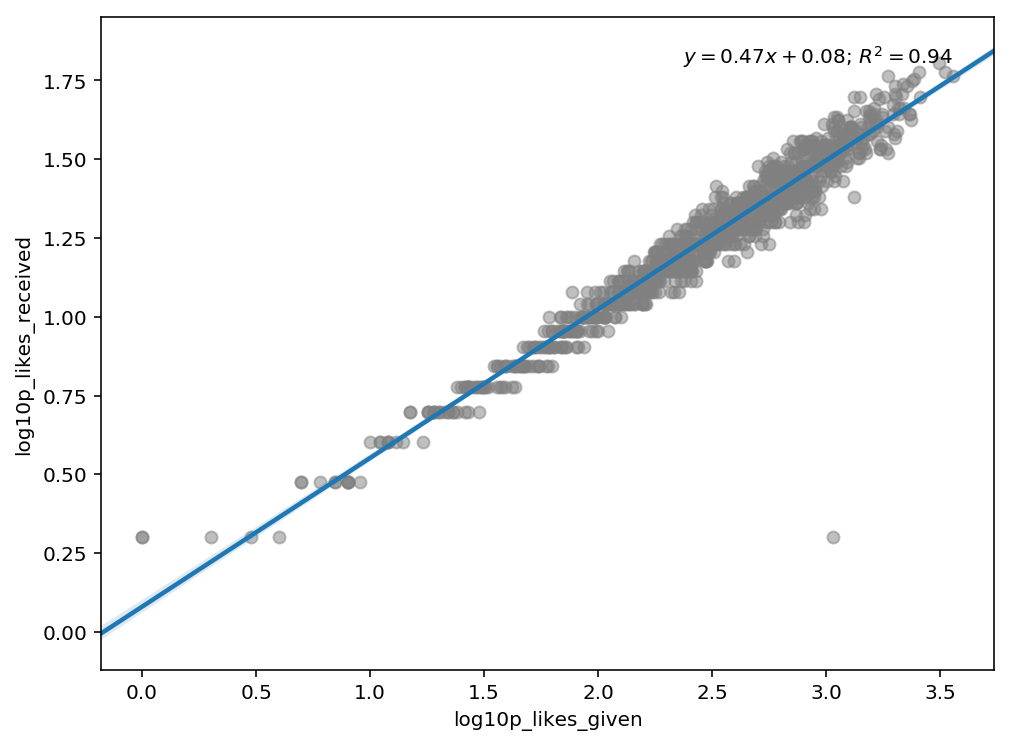

In [6]:
def plot_likes_2(df):
    df = df.copy()
    df['log10p_likes_given'] = np.log10(df.likes_given + 1)
    df['log10p_likes_received'] = np.log10(df.likes_received + 1)
    fig, ax = plt.subplots()
    sns.regplot(df.log10p_likes_given, df.log10p_likes_received,
                ax=ax, scatter_kws=dict(alpha=0.5, color='gray'))
    ax.text(
        x=df.log10p_likes_given.max(), 
        y=df.log10p_likes_received.max(), 
        s=utils.summarize_linear_regression(
            df.log10p_likes_given, df.log10p_likes_received),
        ha='right'
    )
    
plot_likes_2(df_likes_small)

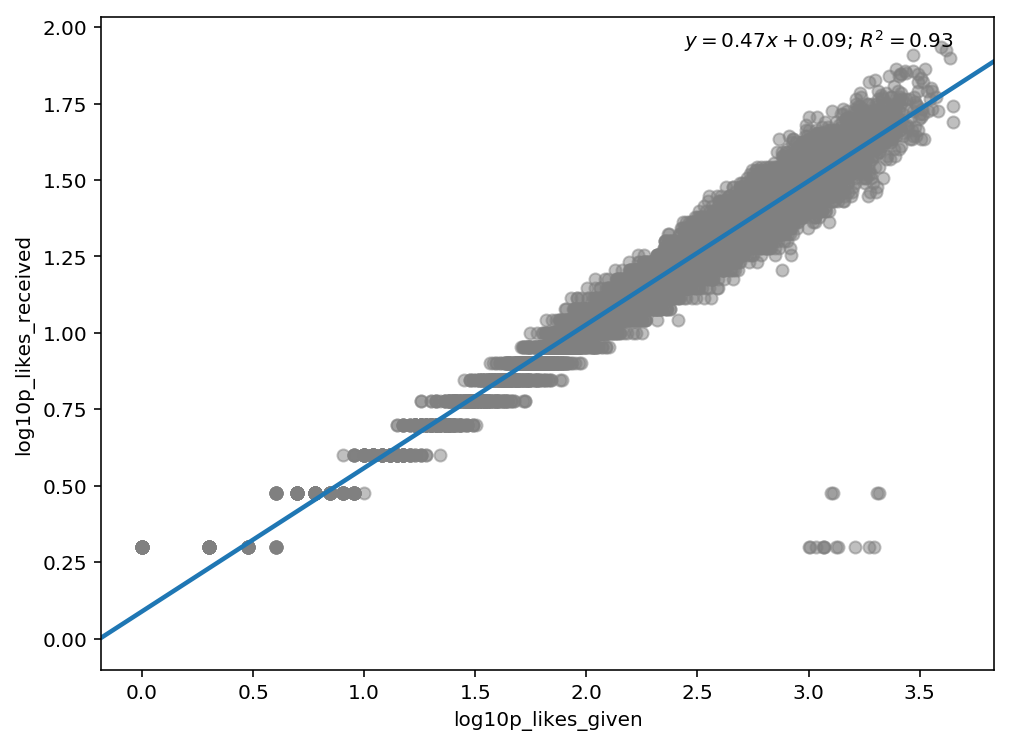

In [7]:
df_likes_large = utils.generate_data(seed=223344, size=1e4)
plot_likes_2(df_likes_large)

## What you should do

### A. Audience
What is your Audience?

Let's assume we are talking to analysts and support engineers about spammers

### B. Build the graph

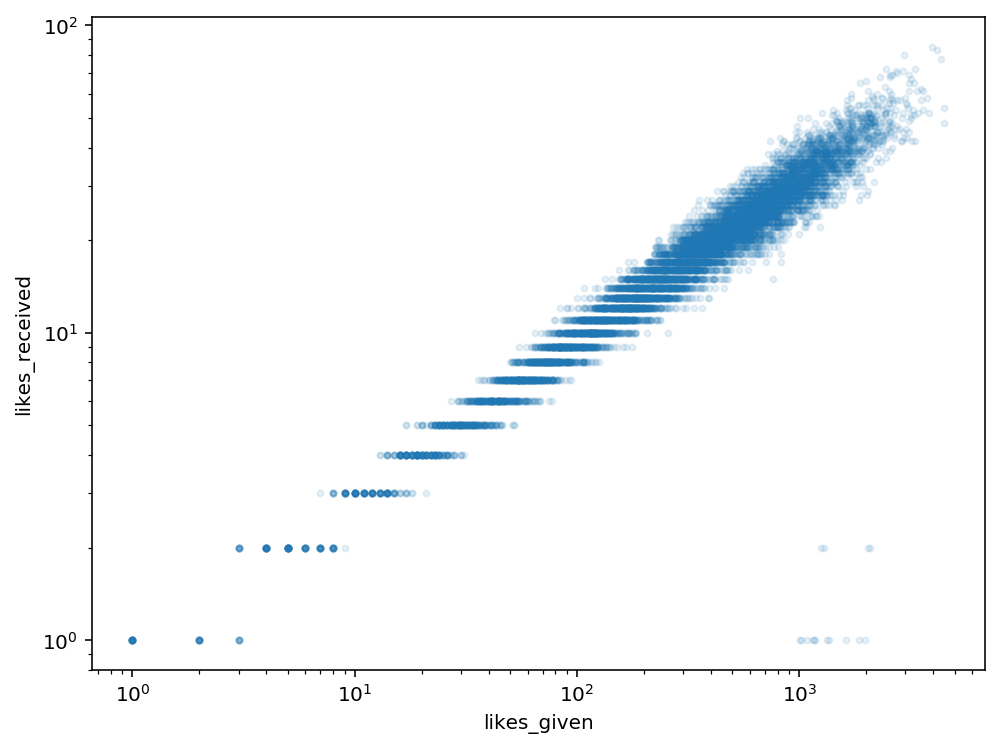

In [8]:
def plot_likes_3(df):
    fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.', alpha=0.1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('likes_given')
    ax.set_ylabel('likes_received')

plot_likes_3(df_likes_large)

### C. Conclusion
What does the graph mean? "What" vs. "So what"

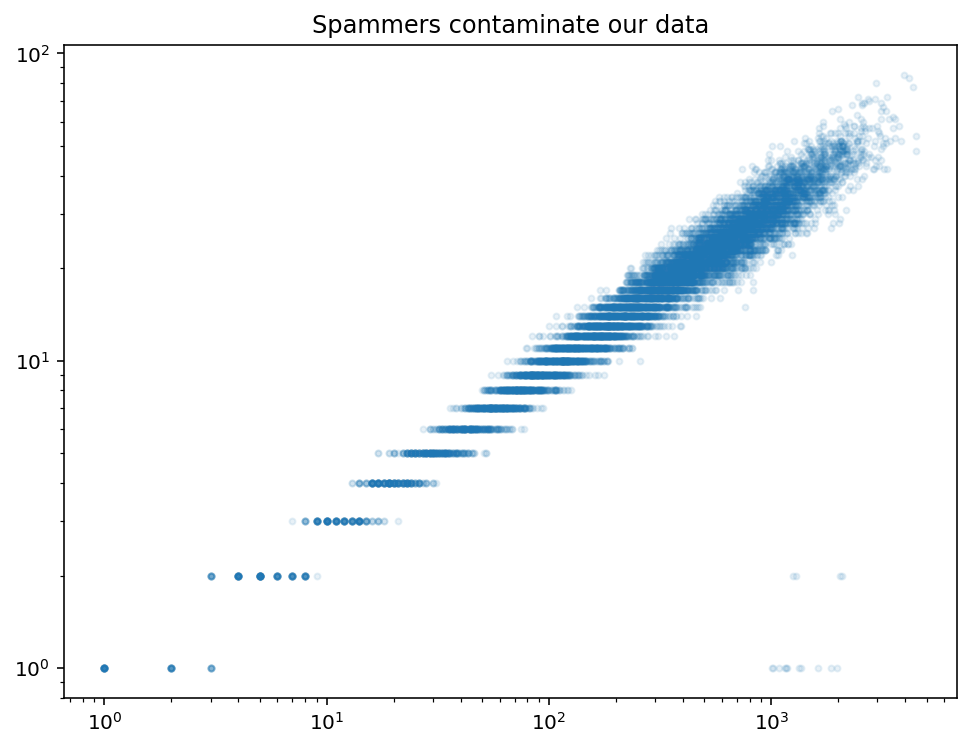

In [9]:

def plot_likes_4(df):
    fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.', alpha=0.1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Spammers contaminate our data')
    


plot_likes_4(df_likes_large)

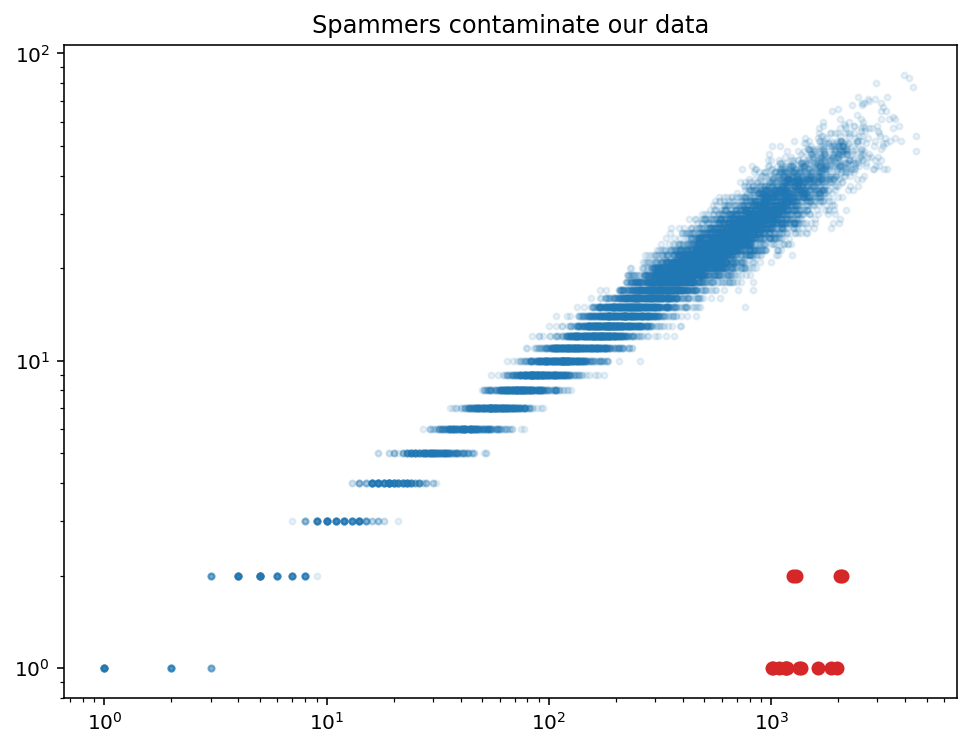

In [10]:
# Same as above but with anomaly marked
def plot_likes_5(df):
    fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.', alpha=0.1)
    outlier_selection = utils.select_outliers(
        np.log10(df[['likes_given', 'likes_received']] + 1)
    )
    ax.plot(df.likes_given[outlier_selection],
            df.likes_received[outlier_selection], 
            'o', color='C3')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Spammers contaminate our data')
    


plot_likes_5(df_likes_large)

### D. Delete (data-ink ratio & readability)

Remove unneeded elements. Increase the readability

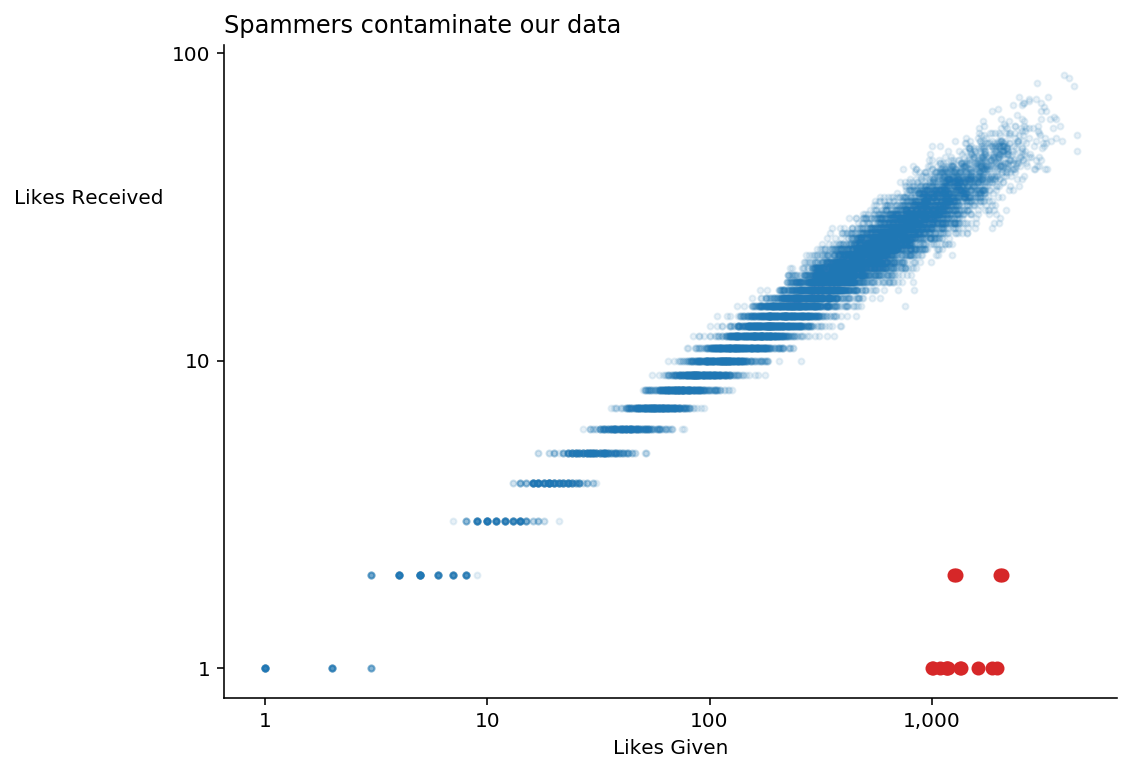

In [11]:
def plot_likes_6(df):
    fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.', alpha=0.1)
    outlier_selection = utils.select_outliers(
        np.log10(df[['likes_given', 'likes_received']] + 1)
    )
    ax.plot(df.likes_given[outlier_selection],
            df.likes_received[outlier_selection], 'o', color='C3')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ticks = [1, 10, 100, 1000]
    labels = [f'{t:,d}' for t in ticks]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(ticks[:-1])
    ax.set_yticklabels(labels[:-1])
    ax.set_title('Spammers contaminate our data', x=0, ha='left')
    ax.set_xlabel('Likes Given')
    ax.set_ylabel('Likes Received', rotation=0, ha='right', y=0.75)
    ax.minorticks_off()
    sns.despine(ax=ax)


plot_likes_6(df_likes_large)

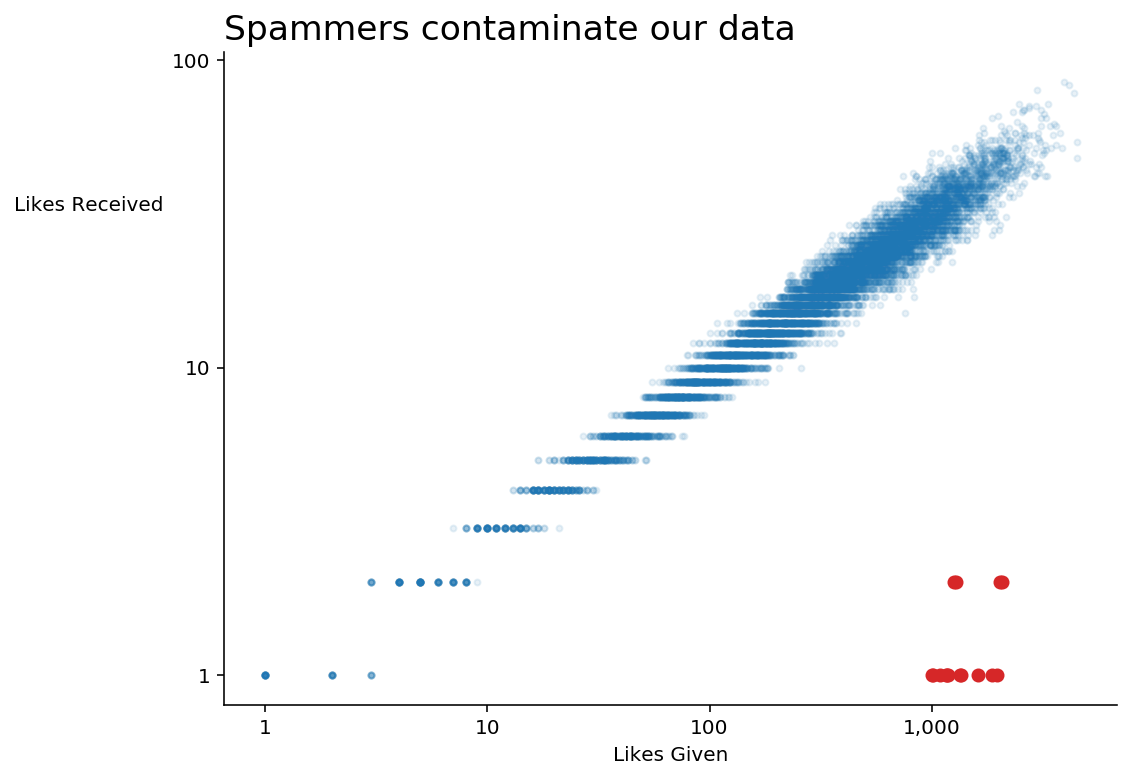

In [12]:
# A more reusable function
def plot_likes_7(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(df.likes_given, df.likes_received, '.', alpha=0.1)
    outlier_selection = utils.select_outliers(
        np.log10(df[['likes_given', 'likes_received']] + 1)
    )
    ax.plot(df.likes_given[outlier_selection],
            df.likes_received[outlier_selection], 'o', color='C3')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ticks = [1, 10, 100, 1000]
    labels = [f'{t:,d}' for t in ticks]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(ticks[:-1])
    ax.set_yticklabels(labels[:-1])
    ax.set_title('Spammers contaminate our data',
                 x=0, ha='left', fontsize='xx-large')
    ax.set_xlabel('Likes Given')
    ax.set_ylabel('Likes Received', 
                  rotation=0, 
                  ha='right',
                  y=0.75)
    ax.minorticks_off()
    sns.despine(ax=ax)
    return ax


plot_likes_7(df_likes_large)

### New audience, new graph

Convince the "general public" to be more socially active

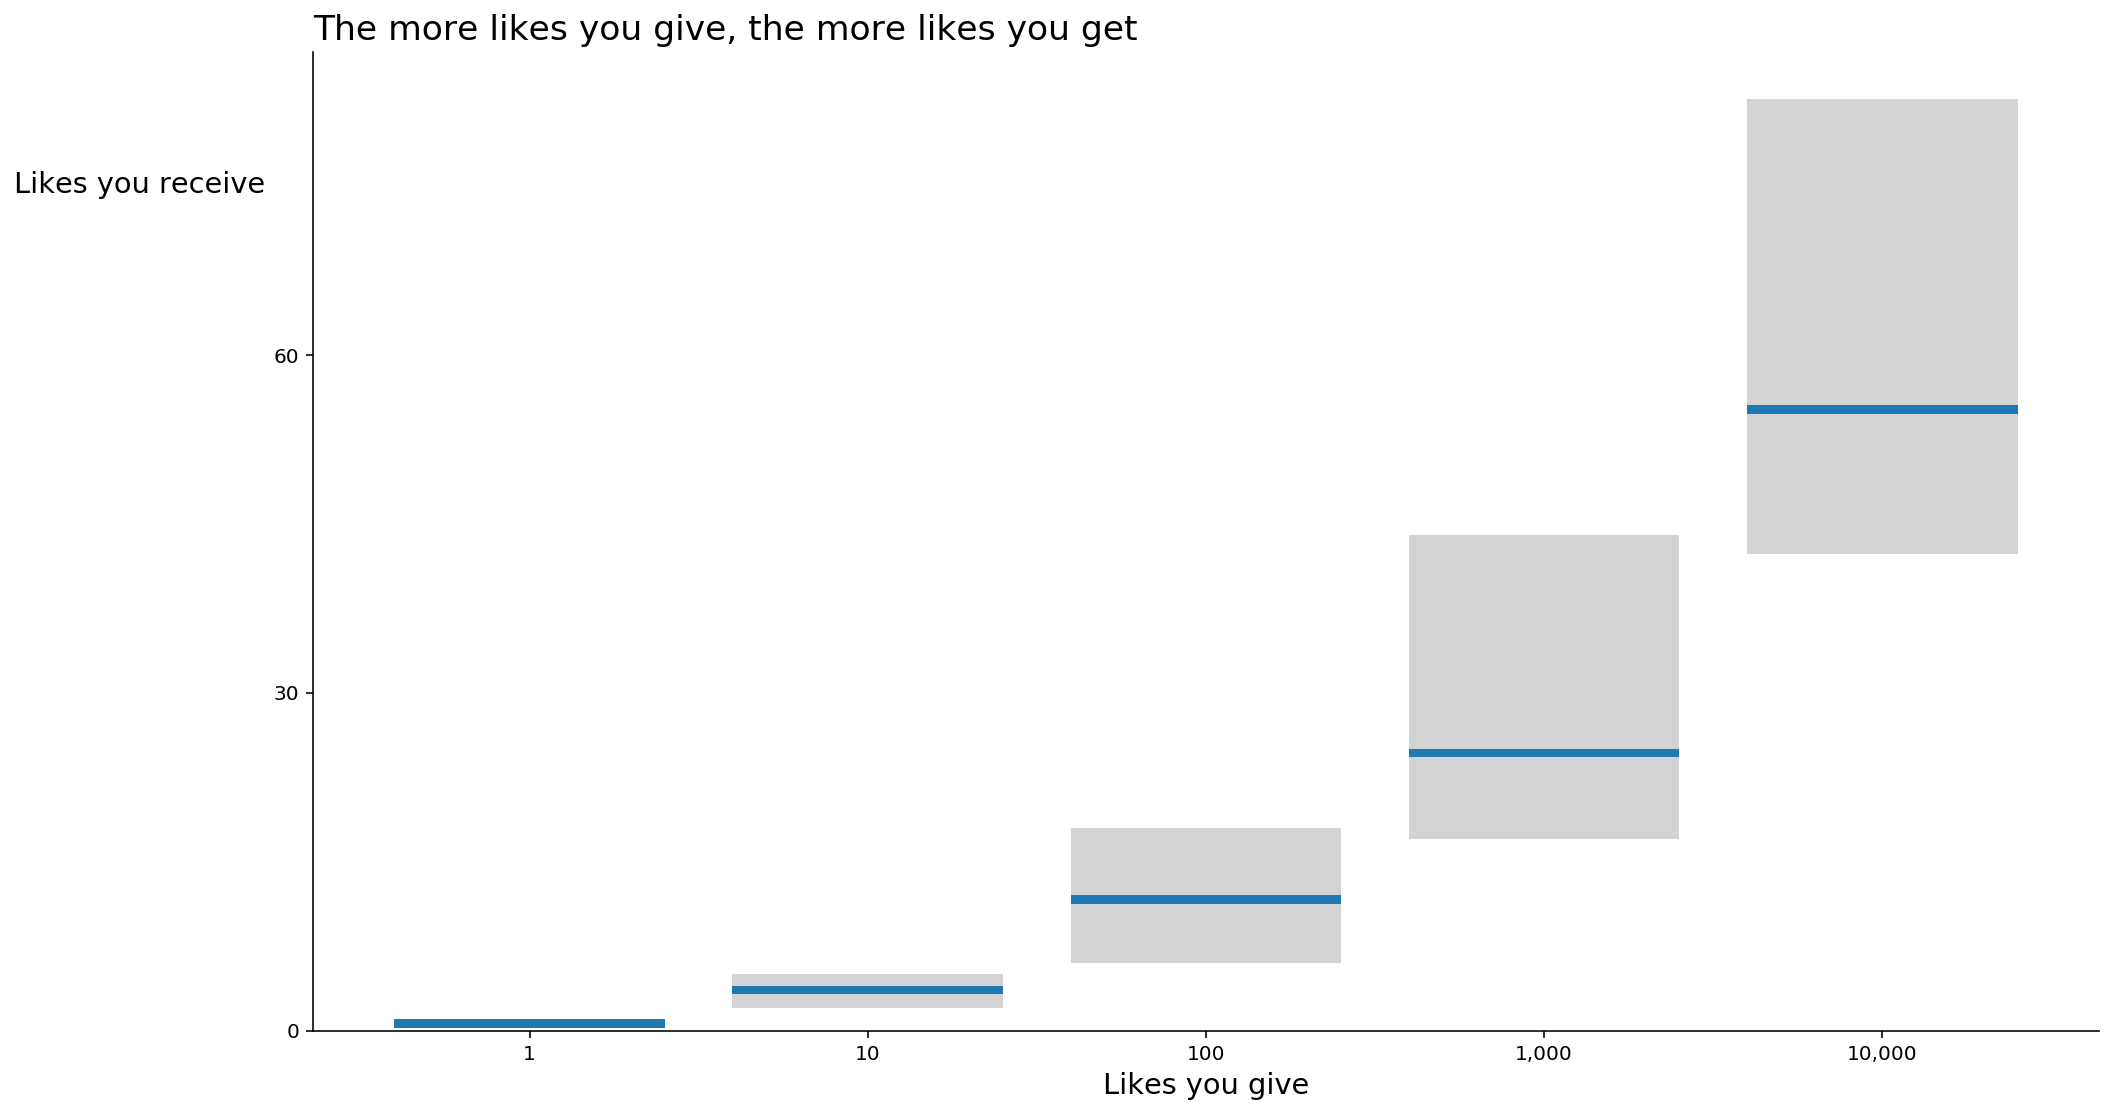

In [13]:
def plot_likes_8(df, ax=None):
    df['likes_given_binned'] = np.power(
        10,
        np.round(
            np.log10(df.likes_given + 1), 0
        ).astype(int)
    )
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 9))
    gr = df.groupby('likes_given_binned')
    xs = []
    bottoms = []
    tops = []
    medians = []
    for given, tbl in sorted(gr):
        x = np.log10(given)
        bottom, median, top = np.percentile(
            tbl['likes_received'], [5, 50, 95])
        xs.append(x)
        tops.append(top)
        medians.append(median)
        bottoms.append(bottom)
    medians = np.array(medians)
    bottoms = np.array(bottoms)
    tops = np.array(tops)
    ax.bar(x=xs, height=tops-bottoms, bottom=bottoms, color='lightgray')

    # A dirty hack to draw the medians
    delta = 0.75
    ax.bar(x=xs, height=delta, bottom=medians-delta, color='C0')
    ax.set_xticks(xs)
    ax.set_xticklabels([f'{int(10**x):,d}' for x in xs])
    ax.set_xlabel('Likes you give', fontsize='x-large')
    ax.set_yticks([0, 30, 60])
    ax.set_ylabel('Likes you receive', rotation=0, y=0.85, ha='right', fontsize='x-large')
    ax.set_title('The more likes you give, the more likes you get',
                 ma='left', ha='left', x=0, fontsize='xx-large')
    sns.despine(ax=ax)
    return ax


plot_likes_8(df_likes_large)